Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten

from tensorflow.keras.utils import to_categorical


In [19]:
import os
print(os.listdir('flowers/flowers'))

FLOWER_DAISY_DIR = 'flowers/daisy'
FLOWER_SUNFLOWER_DIR = 'flowers/sunflower'
FLOWER_TULIP_DIR = 'flowers/tulip'
FLOWER_DANDI_DIR = 'flowers/dandelion'
FLOWER_ROSE_DIR = 'flowers/rose'

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [20]:
def assign_label(img,flower_type):
    return flower_type

In [21]:
def make_train_data(flower_type,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        

In [22]:
IMG_SIZE = 150
X, Z = [], []

try:
    make_train_data('Daisy',FLOWER_DAISY_DIR)
    print(len(X))
    make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
    print(len(X))
    make_train_data('Tulip',FLOWER_TULIP_DIR)
    print(len(X))
    make_train_data('Rose',FLOWER_ROSE_DIR)
    print(len(X))
    make_train_data('Dandelion',FLOWER_DANDI_DIR)
    print(len(X))
except:
    pass

769
1503
2487
3271


In [23]:
le = LabelEncoder()
Z_enc = le.fit_transform(Z)
Z_enc = to_categorical(Z_enc)
Z_enc[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [24]:
X_std = np.array(X)/255
X_std[0]

array([[[0.5254902 , 0.53333333, 0.53333333],
        [0.56078431, 0.56470588, 0.56470588],
        [0.57647059, 0.57647059, 0.57647059],
        ...,
        [0.58823529, 0.59607843, 0.59607843],
        [0.59607843, 0.60392157, 0.60392157],
        [0.59607843, 0.59607843, 0.59607843]],

       [[0.51764706, 0.5254902 , 0.5254902 ],
        [0.55686275, 0.56078431, 0.56078431],
        [0.57254902, 0.57254902, 0.57254902],
        ...,
        [0.58823529, 0.59607843, 0.59607843],
        [0.59215686, 0.6       , 0.6       ],
        [0.59215686, 0.59215686, 0.59215686]],

       [[0.51372549, 0.5254902 , 0.5254902 ],
        [0.54509804, 0.55294118, 0.55686275],
        [0.56862745, 0.56470588, 0.57254902],
        ...,
        [0.59607843, 0.60392157, 0.60392157],
        [0.58823529, 0.59215686, 0.59215686],
        [0.57647059, 0.57647059, 0.57647059]],

       ...,

       [[0.10196078, 0.18431373, 0.17254902],
        [0.09803922, 0.18039216, 0.16862745],
        [0.10196078, 0

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_std,Z_enc, test_size =0.4, random_state = 101)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("X_test: ", y_test.shape)

X_train:  (2593, 150, 150, 3)
X_test:  (1730, 150, 150, 3)
y_train:  (2593, 5)
X_test:  (1730, 5)


In [29]:
model = tf.keras.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(5, activation = "softmax"))


model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ["accuracy"])

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, verbose = 1)

Epoch 1/10
82/82 [==============================] - 139s 2s/step - loss: 1.1217 - accuracy: 0.5310 - val_loss: 1.1574 - val_accuracy: 0.5075
Epoch 2/10
82/82 [==============================] - 134s 2s/step - loss: 1.0256 - accuracy: 0.5877 - val_loss: 1.0870 - val_accuracy: 0.5919
Epoch 3/10
82/82 [==============================] - 138s 2s/step - loss: 0.9053 - accuracy: 0.6444 - val_loss: 0.9435 - val_accuracy: 0.6370
Epoch 4/10
82/82 [==============================] - 134s 2s/step - loss: 0.8094 - accuracy: 0.6826 - val_loss: 1.0143 - val_accuracy: 0.6243
Epoch 5/10
82/82 [==============================] - 135s 2s/step - loss: 0.6788 - accuracy: 0.7354 - val_loss: 0.9602 - val_accuracy: 0.6659
Epoch 6/10
82/82 [==============================] - 136s 2s/step - loss: 0.5336 - accuracy: 0.8002 - val_loss: 1.0825 - val_accuracy: 0.6665
Epoch 7/10
82/82 [==============================] - 134s 2s/step - loss: 0.4272 - accuracy: 0.8473 - val_loss: 1.1885 - val_accuracy: 0.6538
Epoch 8/10
82

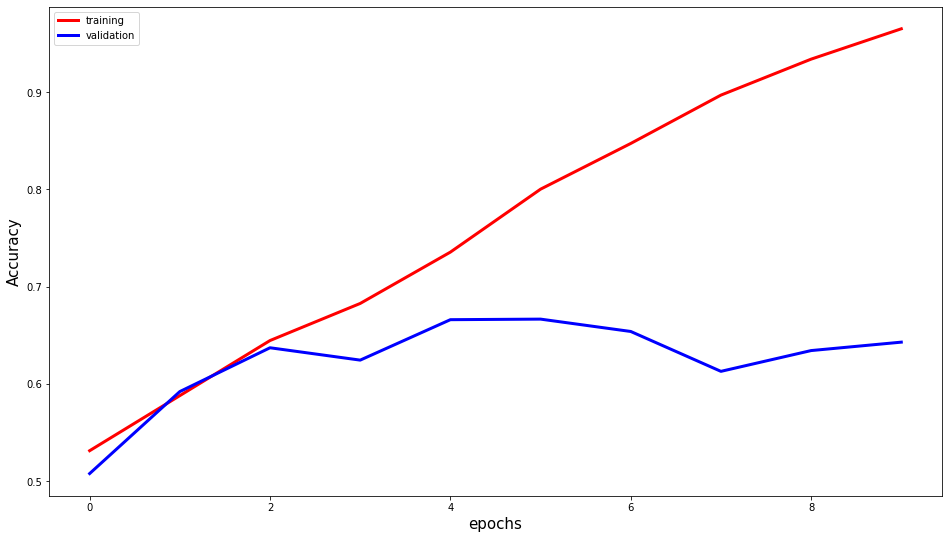

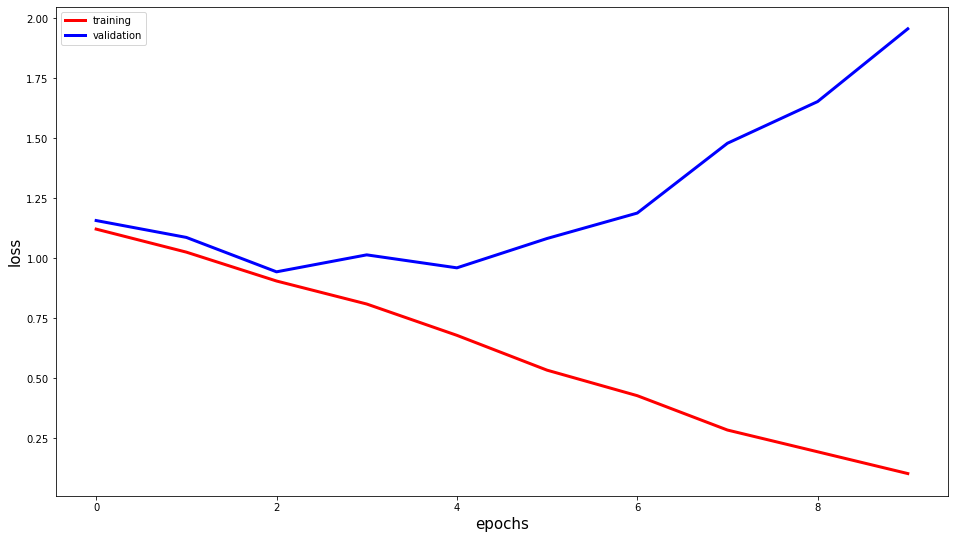

In [32]:
# Plot history
def plot_hist(history):
    fig = plt.figure(figsize=(16,9))
    plt.rcParams['axes.labelsize'] = 15
    plt.plot(history.history['accuracy'],'red',linewidth=3.0, label ="training")
    plt.plot(history.history['val_accuracy'],'blue',linewidth=3.0, label = "validation")
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot history

    fig = plt.figure(figsize=(16,9))
    plt.rcParams['axes.labelsize'] = 15
    plt.plot(history.history['loss'],'red',linewidth=3.0, label ="training")
    plt.plot(history.history['val_loss'],'blue',linewidth=3.0, label = "validation")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
plot_hist(history)

In [33]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
predictions = model.predict(X_test[:10])
print("predictions shape:", predictions.shape)

Evaluate on test data
55/55 [==============================] - 21s 372ms/step - loss: 1.9567 - accuracy: 0.6428
test loss, test acc: [1.956685185432434, 0.6427745819091797]
Generate predictions for 10 samples
predictions shape: (10, 5)


In [38]:
le.inverse_transform(np.argmax(y_test[:10],axis=1))

array(['Sunflower', 'Rose', 'Rose', 'Tulip', 'Dandelion', 'Sunflower',
       'Dandelion', 'Dandelion', 'Sunflower', 'Daisy'], dtype='<U9')

In [39]:
le.inverse_transform(np.argmax(predictions,axis=1))

array(['Sunflower', 'Rose', 'Tulip', 'Tulip', 'Dandelion', 'Sunflower',
       'Daisy', 'Tulip', 'Sunflower', 'Tulip'], dtype='<U9')